<a href="https://colab.research.google.com/github/hydekage/Sistem-Automasi/blob/master/SISTEM_OTOMASI_MODUL_RLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  Transfer Function/Fungsi Alih MK SISTEM AUTOMASI/CPS ##

### Pemodelan Pada Rangkaian Listrik ###

#### Oleh: Sabriansyah R. A ####

Pelajari file tersebut: <B>[my link](file:///RLCTF.pdf)</B>

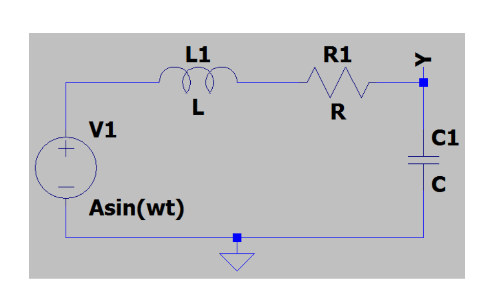

Pada gambar diatas, bagaimana cara kita memodelkan tegangan pada beban $R$ ($V_R$) atau tegangan pada ($V_C$) ?
<BR>Berdasarkan hukum Ohm: $V=iR$</BR>
<BR>Berdasarkan hukum Faraday: $V_L=L\frac{d_i}{dt}$
<BR>Berdasarkan hukum Kirchoff:$V_s=V_r+V_L+V_c$ </BR>

Diketahui:
$${A} = \begin{bmatrix} {0} & \frac{1}{C}\\ -\frac{1}{C} & -\frac{R}{L}\end{bmatrix}$$
$${B} = \begin{bmatrix} {0}\\{\frac{1}{L}}\end{bmatrix}$$
$${C} = \begin{bmatrix} 1 & 0\\ 0 & 1\end{bmatrix}$$
$${D} = 0 $$
Hitung:
$$\frac{Y(s)}{U(s)} = {C[sI−A]^{−1}}B+D $$



###Inisialisasi Symbol dengan Symbolic Python ###

In [ ]:
import sympy as sp
C,L, R, omega = sp.symbols(r'C,L,R,omega')
display(C,L,R,omega)

C

L

R

omega

### Membuat Persamaan KCL & KVL ###

In [ ]:
i, vs, t, vc, ic = sp.symbols('i,V_s, t,V_c,i_c')
id = (sp.Function('i')(t).diff(t))
iv = (sp.Function('vc')(t).diff(t))
vr = i*R
print("Persamaan V_r:")
display(vr)
vl = L*id
print("Persamaan V_L:")
display(vl)
print("Persamaan I_C:")
ic=C*iv
display(ic)
EQ = -vs+vr+vl+vc
print("Persamaan V_L+V_r+V_c-V_s=0:")
display(EQ)
display(sp.solve(EQ,id)[0])

Persamaan V_r:


R*i

Persamaan V_L:


L*Derivative(i(t), t)

Persamaan I_C:


C*Derivative(vc(t), t)

Persamaan V_L+V_r+V_c-V_s=0:


L*Derivative(i(t), t) + R*i + V_c - V_s

(-R*i - V_c + V_s)/L

### Inisialisasi State Space Variables ###

In [ ]:
x1 = vc
x2 = i
display('x1:',x1,'x2:',x2)

'x1:'

V_c

'x2:'

i

sehingga,
$$\begin{bmatrix} {\dot{x_1}}\\{\dot{x_2}}\end{bmatrix} = \begin{bmatrix} {x_1}\\{x_2}\end{bmatrix}$$

$$\begin{bmatrix} {\dot{V_c}}\\{\dot{i}}\end{bmatrix} = {A}\begin{bmatrix} {V_c}\\{i}\end{bmatrix}+Bu$$

Dikarenakan kita menginginkan untuk mendapatkan fungsi alih pada $R$ dan $V_c$ maka:

$$y = {C}\begin{bmatrix} {V_c}\\{i}\end{bmatrix}+Du$$

sehingga:

$$y = \begin{bmatrix} {1}&{1}\end{bmatrix} \begin{bmatrix} {V_c}\\{i}\end{bmatrix}+Du$$


In [51]:
A_Row_1 = (0,1/C)
A_Row_2 = (-1/L,-R/L)
A  = sp.Matrix([A_Row_1,A_Row_2])
display('Matrix A:',A)
print("\n")
B_Row_1 = (0)
B_Row_2 = (1/L)
B = sp.Matrix([B_Row_1,B_Row_2])
display('Matrix B:',B)
C_Row_1 = (1,0)
C_Row_2 = (0,1)
C_matrix = sp.Matrix([C_Row_1,C_Row_2])
display('Matrix C:',C_matrix)

'Matrix A:'

Matrix([
[   0,  1/C],
[-1/L, -R/L]])

'Matrix B:'

Matrix([
[  0],
[1/L]])

'Matrix C:'

Matrix([
[1, 0],
[0, 1]])

Masukkan ke Rumus:

$$\frac{Y(s)}{U(s)} = {C[sI−A]^{−1}}B+D $$

In [52]:
s = sp.Symbol('s')
I = sp.eye(A.shape[0])
#display(I)
inv_M=(I*s - A).inv()
#display(inv_M)
TFL = C_matrix*inv_M*B
display("Transfer Function  didapatkan:",TFL)

'Transfer Function  didapatkan:'

Matrix([
[  1/(C*L*s**2 + C*R*s + 1)],
[C*s/(C*L*s**2 + C*R*s + 1)]])

In [53]:
display(TFL[0])
display(TFL[1])

1/(C*L*s**2 + C*R*s + 1)

C*s/(C*L*s**2 + C*R*s + 1)

In [ ]:
TF_VC = TFL[0].subs(s,sp.I*omega)
display(TF_VC)
TF_VR = TFL[1].subs(s,sp.I*omega)
display(TF_VR)

1/(-C*L*omega**2 + I*C*R*omega + 1)

I*C*R*omega/(-C*L*omega**2 + I*C*R*omega + 1)

In [ ]:
TF_VC_abs = sp.Abs(TF_VC)
display(TF_VC_abs)
TF_VR_abs = sp.Abs(TF_VR)
display(TF_VR_abs)

1/Abs(-C*L*omega**2 + I*C*R*omega + 1)

Abs(C*R*omega/(-C*L*omega**2 + I*C*R*omega + 1))

In [ ]:
TF_VC_func = sp.lambdify([C,L, R, omega],TF_VC_abs)

In [ ]:
print(TF_VC_func(1e-6,10e-6,10,2*3.14*50))

0.9999960561828447


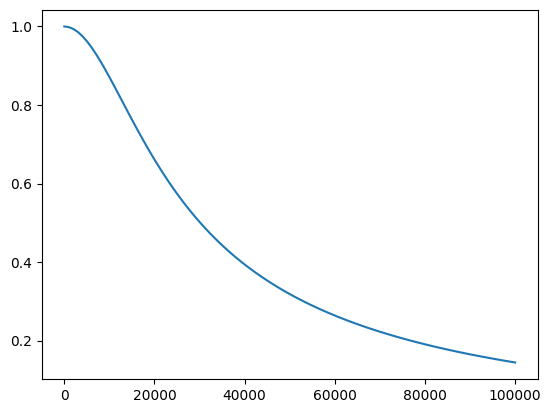

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_value = np.linspace(1,100e3,100)
y_value = []
for i in x_value:
    y_value.append(TF_VC_func(1e-6,10e-6,10,2*3.14*i))
#print(y_value)
plt.plot(x_value,y_value)
plt.show()